In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [3]:
df2 = pd.read_csv('matches.csv')
df2.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [4]:
match1 = df2[(df2['team1'] == 'Sunrisers Hyderabad') & ((df2['team2'] == 'Delhi Daredevils') | (df2['team2'] == 'Delhi Capitals'))]
match2 = df2[((df2['team1'] == 'Delhi Daredevils') | (df2['team1'] == 'Delhi Capitals')) & (df2['team2'] == 'Sunrisers Hyderabad')]

Match1 = Hyderabad Home Ground

Match2 = Delhi Home Ground

# Overall Hyderabad vs Delhi:

In [5]:
match = pd.concat((match1,match2))
match.head()

id  season       city        date                team1  \
20    21    2017  Hyderabad  2017-04-19  Sunrisers Hyderabad   
38    39    2017      Delhi  2017-05-02  Sunrisers Hyderabad   
468  469    2014        NaN  2014-04-25  Sunrisers Hyderabad   
560  561    2015     Raipur  2015-05-09  Sunrisers Hyderabad   
617  618    2016  Hyderabad  2016-05-12  Sunrisers Hyderabad   

                team2          toss_winner toss_decision  result  dl_applied  \
20   Delhi Daredevils  Sunrisers Hyderabad           bat  normal           0   
38   Delhi Daredevils     Delhi Daredevils         field  normal           0   
468  Delhi Daredevils  Sunrisers Hyderabad           bat  normal           0   
560  Delhi Daredevils  Sunrisers Hyderabad           bat  normal           0   
617  Delhi Daredevils     Delhi Daredevils         field  normal           0   

                  winner  win_by_runs  win_by_wickets player_of_match  \
20   Sunrisers Hyderabad           15               0   KS Williamson   
38      Delhi Daredevils            0               6  Mohammed Shami   
468  Sunrisers Hyderabad            4               0        AJ Finch   
560  Sunrisers Hyderabad            6               0    MC Henriques   
617     Delhi Daredevils            0               7       CH Morris   

                                                venue      umpire1  \
20          Rajiv Gandhi International Stadium, Uppal  CB Gaffaney   
38                                   Feroz Shah Kotla     YC Barde   
468               Dubai International Cricket Stadium    M Erasmus   
560  Shaheed Veer Narayan Singh International Stadium  VA Kulkarni   
617         Rajiv Gandhi International Stadium, Uppal   K Bharatan   

         umpire2 umpire3  
20      NJ Llong     NaN  
38   Nitin Menon     NaN  
468       S Ravi     NaN  
560       S Ravi     NaN  
617    M Erasmus     NaN

Matches played between Hyderabad and Delhi.

In [6]:
match.shape

(15, 18)

In [7]:
match['winner'].value_counts()

Sunrisers Hyderabad    9
Delhi Daredevils       4
Delhi Capitals         2
Name: winner, dtype: int64

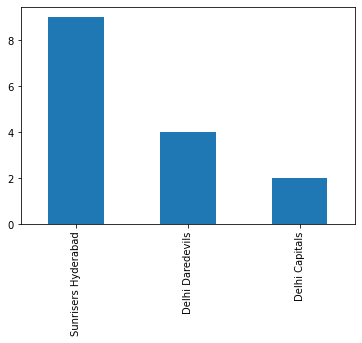

In [8]:
match['winner'].value_counts().plot.bar()
plt.show()

**Hyderabad won 9 times and Delhi won 6 times against each other.**

In [9]:
match['toss_winner'].value_counts()

Delhi Daredevils       8
Sunrisers Hyderabad    6
Delhi Capitals         1
Name: toss_winner, dtype: int64

In [10]:
match['toss_decision'].value_counts()

bat      8
field    7
Name: toss_decision, dtype: int64

In [11]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts()

Sunrisers Hyderabad    5
Delhi Daredevils       4
Delhi Capitals         1
Name: winner, dtype: int64

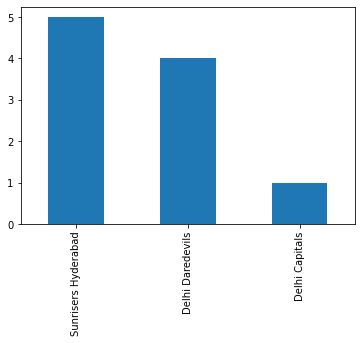

In [12]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts().plot.bar()
plt.show()

**Both won the toss and won the match 5 times. So winning toss doesn't have much affect to winning the match.**

In [13]:
ids = list(match['id'])
delivery = df1[df1['match_id'].isin(ids)]
delivery.head()

match_id  inning         batting_team      bowling_team  over  ball  \
4810        21       1  Sunrisers Hyderabad  Delhi Daredevils     1     1   
4811        21       1  Sunrisers Hyderabad  Delhi Daredevils     1     2   
4812        21       1  Sunrisers Hyderabad  Delhi Daredevils     1     3   
4813        21       1  Sunrisers Hyderabad  Delhi Daredevils     1     4   
4814        21       1  Sunrisers Hyderabad  Delhi Daredevils     1     5   

        batsman non_striker   bowler  is_super_over  ...  bye_runs  \
4810  DA Warner    S Dhawan  J Yadav              0  ...         0   
4811   S Dhawan   DA Warner  J Yadav              0  ...         0   
4812   S Dhawan   DA Warner  J Yadav              0  ...         0   
4813  DA Warner    S Dhawan  J Yadav              0  ...         0   
4814  DA Warner    S Dhawan  J Yadav              0  ...         0   

      legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
4810            0            1             0             1           1   
4811            0            0             0             4           0   
4812            0            0             0             1           0   
4813            0            0             0             0           0   
4814            0            0             0             1           0   

      total_runs  player_dismissed dismissal_kind fielder  
4810           2               NaN            NaN     NaN  
4811           4               NaN            NaN     NaN  
4812           1               NaN            NaN     NaN  
4813           0               NaN            NaN     NaN  
4814           1               NaN            NaN     NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Hyderabad and Delhi.

In [14]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## How many runs will be scored totally in the match:

In [15]:
total_run = delivery['batsman_runs'].sum()
total_run

4390

Total 4390 runs made in Hyderabad vs Delhi match till now.

In [16]:
total_run_Hyderabad = delivery[delivery['batting_team'] == 'Sunrisers Hyderabad']['batsman_runs'].sum()
total_run_Hyderabad

2138

Hyderabad scored total 2138 runs against Delhi till now.

In [17]:
total_run_Delhi = delivery[delivery['batting_team'] != 'Sunrisers Hyderabad']['batsman_runs'].sum()
total_run_Delhi

2252

Delhi scored total 2252 runs against Hyderabad till now.

In [18]:
avg_run_per_match = math.ceil(total_run/len(ids))
avg_run_per_match

293

293 runs in an average made in a match between Hyderabad and Delhi.

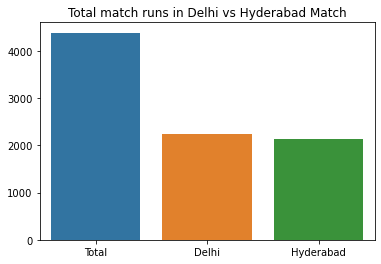

In [19]:
total_match_runs = pd.Series([total_run,total_run_Delhi,total_run_Hyderabad],index = ['Total','Delhi','Hyderabad'])
sns.barplot(x=total_match_runs.index,y=total_match_runs)
plt.title('Total match runs in Delhi vs Hyderabad Match')
plt.show()

**Delhi scored more runs against Hyderabad.**

In [20]:
total_run_Hyderabad_batting_first = delivery[(delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 1)]['batsman_runs'].sum()
total_run_Hyderabad_batting_first

1154

Hyderabad scored total 1154 runs against Delhi while batting first.

In [21]:
total_matches_batting_first_Hyderabad = len(delivery[(delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 1)]['match_id'].unique())
total_matches_batting_first_Hyderabad

7

Total 7 matches played by Hyderabad while batting first.

In [22]:
avg_run_Hyderabad_batting_first = math.ceil(total_run_Hyderabad_batting_first/total_matches_batting_first_Hyderabad)
avg_run_Hyderabad_batting_first

165

Hyderabad scored 165 in as average against Delhi while batting first.

In [23]:
total_run_Hyderabad_batting_second = delivery[(delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 2)]['batsman_runs'].sum()
total_run_Hyderabad_batting_second

984

Hyderabad scored total 984 runs against Delhi while batting second.

In [24]:
total_matches_batting_second_Hyderabad = len(delivery[(delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['inning'] == 2)]['match_id'].unique())
total_matches_batting_second_Hyderabad

8

Total 8 matches played by Hyderabad while batting second.

In [25]:
avg_run_Hyderabad_batting_second = math.ceil(total_run_Hyderabad_batting_second/total_matches_batting_second_Hyderabad)
avg_run_Hyderabad_batting_second

123

Hyderabad scored 123 in as average against Delhi while batting second.

In [26]:
total_run_Delhi_batting_first = delivery[(delivery['batting_team'] != 'Sunrisers Hyderabad') & (delivery['inning'] == 1)]['batsman_runs'].sum()
total_run_Delhi_batting_first

1111

Delhi scored total 1111 runs against Hyderabad while batting first.

In [27]:
total_matches_batting_first_Delhi = len(delivery[(delivery['batting_team'] != 'Sunrisers Hyderabad') & (delivery['inning'] == 1)]['match_id'].unique())
total_matches_batting_first_Delhi

8

Total 8 matches played by Delhi while batting first.

In [28]:
avg_run_Delhi_batting_first = math.ceil(total_run_Delhi_batting_first/total_matches_batting_first_Delhi)
avg_run_Delhi_batting_first

139

Delhi scored 139 runs in an average against Hyderabad while batting first.

In [29]:
total_run_Delhi_batting_second = delivery[(delivery['batting_team'] != 'Sunrisers Hyderabad') & (delivery['inning'] == 2)]['batsman_runs'].sum()
total_run_Delhi_batting_second

1141

In [30]:
total_matches_batting_second_Delhi = len(delivery[(delivery['batting_team'] != 'Sunrisers Hyderabad') & (delivery['inning'] == 2)]['match_id'].unique())
total_matches_batting_second_Delhi

7

Total 7 matches played by Delhi while batting second.

In [31]:
avg_run_Delhi_batting_second = math.ceil(total_run_Delhi_batting_second/total_matches_batting_second_Delhi)
avg_run_Delhi_batting_second

163

Delhi scored 163 runs in an average against Hyderabad while batting second.

In [32]:
total_runs_Hyderabad_batting_first_Delhi_batting_second = avg_run_Hyderabad_batting_first+avg_run_Delhi_batting_second
total_runs_Hyderabad_batting_first_Delhi_batting_second

328

In [33]:
total_runs_Delhi_batting_first_Hyderabad_batting_second = avg_run_Delhi_batting_first+avg_run_Hyderabad_batting_second
total_runs_Delhi_batting_first_Hyderabad_batting_second

262

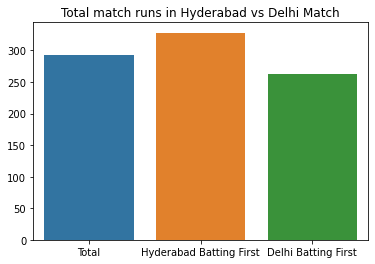

In [34]:
average_match_runs = pd.Series([avg_run_per_match,total_runs_Hyderabad_batting_first_Delhi_batting_second,total_runs_Delhi_batting_first_Hyderabad_batting_second],index = ['Total','Hyderabad Batting First','Delhi Batting First'])
sns.barplot(x=average_match_runs.index,y=average_match_runs)
plt.title('Total match runs in Hyderabad vs Delhi Match')
plt.show()

**So when Hyderabad bat first the total score is higher than when Delhi bat first.**

## How many dismissals will occur in the match where the batsman gets out caught:

In [35]:
total_wickets = len(delivery[delivery['dismissal_kind'].isin(['caught','caught and bowled'])])
total_wickets

104

total 104 dismissals has been occured where batsman got out caught in Hyderabad vs Delhi match.

In [36]:
avg_wickets = total_wickets/len(ids)
avg_wickets

6.933333333333334

~7 dismissals in an average in a match occured where batsman got out caught.

In [37]:
total_wickets_batting_first = len(delivery[(delivery['dismissal_kind'].isin(['caught','caught and bowled'])) & (delivery['inning'] == 1)])
total_wickets_batting_first

57

total 57 dismissals has been occured for batting team in the first inning where batsman got out caught in Hyderabad vs Delhi match.

In [38]:
avg_wickets_batting_first = total_wickets_batting_first/len(ids)
avg_wickets_batting_first

3.8

~4 dismissals in an average in a match occured where batsman got out caught in the first inning.

In [39]:
total_wickets_batting_second = len(delivery[(delivery['dismissal_kind'].isin(['caught','caught and bowled'])) & (delivery['inning'] == 2)])
total_wickets_batting_second

47

total 47 dismissals has been occured for batting team in the decond inning where batsman got out caught in Hyderabad vs Delhi match.

In [40]:
avg_wickets_batting_second = total_wickets_batting_second/len(ids)
avg_wickets_batting_second

3.1333333333333333

~3 dismissals in an average in a match occured where batsman got out caught in the second inning.

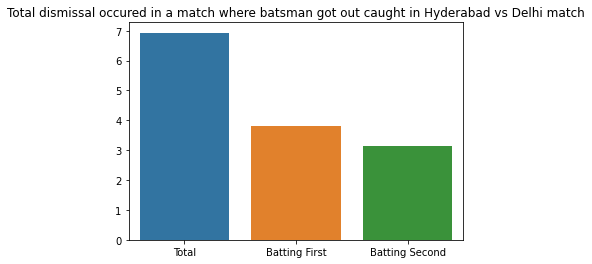

In [41]:
average_wickets = pd.Series([avg_wickets,avg_wickets_batting_first,avg_wickets_batting_second], index = ['Total','Batting First','Batting Second'])
sns.barplot(x = average_wickets.index, y = average_wickets)
plt.title('Total dismissal occured in a match where batsman got out caught in Hyderabad vs Delhi match')
plt.show()

**Batting first team lost more wicket than batting second by caught in Hyderabad vs Delhi match.**

In [42]:
total_wickets_Hyderabad = total_wickets = len(delivery[(delivery['dismissal_kind'].isin(['caught','caught and bowled'])) & (delivery['batting_team'] == 'Sunrisers Hyderabad')])
total_wickets_Hyderabad

46

total 46 dismissals has been occured of Hyderabad where batsman got out caught in Hyderabad vs Delhi match.

In [43]:
avg_wickets_Hyderabad = total_wickets_Hyderabad/len(ids)
avg_wickets_Hyderabad

3.066666666666667

~3 dismissals in an average in a match occured of Hyderabad where batsman got out caught in Hyderabad vs Delhi match.

In [44]:
total_wickets_Delhi = total_wickets = len(delivery[(delivery['dismissal_kind'].isin(['caught','caught and bowled'])) & (delivery['batting_team'] != 'Sunrisers Hyderabad')])
total_wickets_Delhi

58

total 58 dismissals has been occured of Delhi where batsman got out caught in Hyderabad vs Delhi match.

In [45]:
avg_wickets_Delhi = total_wickets_Delhi/len(ids)
avg_wickets_Delhi

3.8666666666666667

~4 dismissals in an average in a match occured of Delhi where batsman got out caught in Hyderabad vs Delhi match.

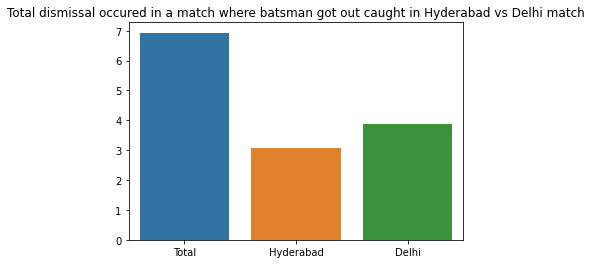

In [46]:
average_wickets_team = pd.Series([avg_wickets,avg_wickets_Hyderabad,avg_wickets_Delhi], index = ['Total','Hyderabad','Delhi'])
sns.barplot(x = average_wickets_team.index, y = average_wickets_team)
plt.title('Total dismissal occured in a match where batsman got out caught in Hyderabad vs Delhi match')
plt.show()

**Delhi lost more wickets by caught than Hyderabad in Hyderabad vs Delhi match.**

In [47]:
total_wickets_overall_Hyderabad = len(df1[(df1['dismissal_kind'].isin(['caught','caught and bowled'])) & (df1['batting_team'] == 'Sunrisers Hyderabad')])
total_wickets_overall_Hyderabad

392

total 392 dismissals has been occured of Hyderabad where batsman got out caught in overall IPL.

In [48]:
total_ids_Hyderabad = list(df1[df1['batting_team'] == 'Sunrisers Hyderabad']['match_id'].unique())
avg_wickets_overall_Hyderabad = total_wickets_overall_Hyderabad/len(total_ids_Hyderabad)
avg_wickets_overall_Hyderabad

3.6296296296296298

~4 dismissals in an average in a match occured of Hyderabad where batsman got out caught in overall IPL.

In [49]:
total_wickets_overall_Delhi = len(df1[(df1['dismissal_kind'].isin(['caught','caught and bowled'])) & ((df1['batting_team'] == 'Delhi Daredevils') | (df1['batting_team'] == 'Delhi Capitals'))])
total_wickets_overall_Delhi

672

total 672 dismissals has been occured of Delhi where batsman got out caught in overall IPL.

In [50]:
total_ids_Delhi = list(df1[((df1['batting_team'] == 'Delhi Daredevils') | (df1['batting_team'] == 'Delhi Capitals'))]['match_id'].unique())
avg_wickets_overall_Delhi = total_wickets_overall_Delhi/len(total_ids_Delhi)
avg_wickets_overall_Delhi

3.7966101694915255

~4 dismissals in an average in a match occured of Delhi where batsman got out caught in overall IPL.

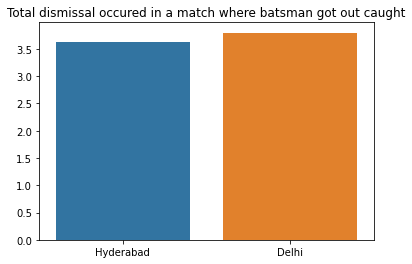

In [51]:
average_wickets_team_overall = pd.Series([avg_wickets_overall_Hyderabad,avg_wickets_overall_Delhi], index = ['Hyderabad','Delhi'])
sns.barplot(x = average_wickets_team_overall.index, y = average_wickets_team_overall)
plt.title('Total dismissal occured in a match where batsman got out caught')
plt.show()

**Delhi lost more wickets by caught than Hyderabad in overall IPL.**

## How many runs more/less will SRH score in the first 6 overs as compared to DC:

In [52]:
runs = []
for j in ids:
    runs_Hyderabad = delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['over'] <= 6)]['total_runs'].sum()
    runs_Delhi = delivery[(delivery['match_id'] == j) & (delivery['batting_team'] != 'Sunrisers Hyderabad') & (delivery['over'] <= 6)]['total_runs'].sum()
    runs.append(np.abs(runs_Hyderabad - runs_Delhi))
runs

[17, 4, 11, 8, 1, 9, 2, 9, 15, 8, 10, 3, 13, 34, 12]

These are the difference of the runs scored by Hyderabad and Delhi in their match.

In [53]:
avg_runs = np.mean(runs)
avg_runs

10.4

So 10 runs more/less scored by Hyderabad in the first 6 overs as compared to Delhi in Hyderabad vs Delhi match..

In [54]:
runs_Hyderabad_batting_first_Delhi_batting_second = []
for j in ids:
    runs_Hyderabad = delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['over'] <= 6) & (delivery['inning'] == 1)]['total_runs'].sum()
    runs_Delhi = delivery[(delivery['match_id'] == j) & (delivery['batting_team'] != 'Sunrisers Hyderabad') & (delivery['over'] <= 6) & (delivery['inning'] == 2)]['total_runs'].sum()
    if (runs_Hyderabad - runs_Delhi) != 0:
        runs_Hyderabad_batting_first_Delhi_batting_second.append(np.abs(runs_Hyderabad - runs_Delhi))
runs_Hyderabad_batting_first_Delhi_batting_second

[17, 4, 11, 8, 1, 9, 2]

These are the difference of the runs scored by Hyderabad and Delhi in their match when Hyderabad batted in first inning and Delhi batted in second inning.

In [55]:
avg_runs_Hyderabad_batting_first_Delhi_batting_second = np.mean(runs_Hyderabad_batting_first_Delhi_batting_second)
avg_runs_Hyderabad_batting_first_Delhi_batting_second

7.428571428571429

So 7 runs more/less scored by Hyderabad in the first 6 overs as compared to Delhi in Hyderabad vs Delhi match when Hyderabad batted in first inning and Delhi batted in second inning.

In [56]:
runs_Delhi_batting_first_Hyderabad_batting_second = []
for j in ids:
    runs_Hyderabad = delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Sunrisers Hyderabad') & (delivery['over'] <= 6) & (delivery['inning'] == 2)]['total_runs'].sum()
    runs_Delhi = delivery[(delivery['match_id'] == j) & (delivery['batting_team'] != 'Sunrisers Hyderabad') & (delivery['over'] <= 6) & (delivery['inning'] == 1)]['total_runs'].sum()
    if (runs_Hyderabad - runs_Delhi) != 0:
        runs_Delhi_batting_first_Hyderabad_batting_second.append(np.abs(runs_Hyderabad - runs_Delhi))
runs_Delhi_batting_first_Hyderabad_batting_second

[9, 15, 8, 10, 3, 13, 34, 12]

These are the difference of the runs scored by Hyderabad and Delhi in their match when Delhi batted in first inning and Hyderabad batted in second inning.

In [57]:
avg_runs_Delhi_batting_first_Hyderabad_batting_second = np.mean(runs_Delhi_batting_first_Hyderabad_batting_second)
avg_runs_Delhi_batting_first_Hyderabad_batting_second

13.0

So 13 runs more/less scored by Hyderabad in the first 6 overs as compared to Delhi in Hyderabad vs Delhi match when Delhi batted in first inning and Hyderabad batted in second inning.

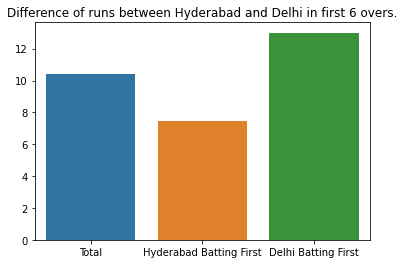

In [58]:
average_runs = pd.Series([avg_runs,avg_runs_Hyderabad_batting_first_Delhi_batting_second,avg_runs_Delhi_batting_first_Hyderabad_batting_second], index = ['Total','Hyderabad Batting First','Delhi Batting First'])
sns.barplot(x = average_runs.index, y = average_runs)
plt.title('Difference of runs between Hyderabad and Delhi in first 6 overs.')
plt.show()

**When Delhi batted in the first inning, the difference is higher.**

In [59]:
runs_overall_Hyderabad = df1[(df1['batting_team'] == 'Sunrisers Hyderabad') & (df1['over'] <= 6)]['total_runs'].sum()
avg_runs_overall_Hyderabad = runs_overall_Hyderabad/len(total_ids_Hyderabad)
avg_runs_overall_Hyderabad

48.5

Hyderabad scored ~49 runs in an average in overall IPL.

In [60]:
runs_overall_Delhi = df1[((df1['batting_team'] == 'Delhi Daredevils') | (df1['batting_team'] == 'Delhi Capitals')) & (df1['over'] <= 6)]['total_runs'].sum()
avg_runs_overall_Delhi = runs_overall_Delhi/len(total_ids_Delhi)
avg_runs_overall_Delhi

46.53107344632768

Hyderabad scored ~46 runs in an average in overall IPL.

## How many extras will be bowled in total during the match by both teams:

In [61]:
extras = []
for j in ids:
    extra = delivery[(delivery['match_id'] == j)]['extra_runs'].sum()
    extras.append(extra)
extras

[11, 11, 11, 8, 14, 17, 14, 10, 9, 16, 13, 9, 5, 16, 14]

These are the total extras given by the teams in Hyderabad vs DC matches.

In [62]:
avg_extras = np.mean(extras)
avg_extras

11.866666666666667

~12 extras are given by the teams in an average in a Hyderabad vs Delhi match.

In [63]:
extras_Hyderabad = []
for j in ids:
    extra = delivery[(delivery['match_id'] == j) & (delivery['bowling_team'] == 'Sunrisers Hyderabad')]['extra_runs'].sum()
    extras_Hyderabad.append(extra)
extras_Hyderabad

[7, 3, 6, 4, 3, 14, 5, 7, 6, 5, 9, 3, 3, 5, 9]

These are the total extras given by Hyderabad in Hyderabad vs Delhi matches.

In [64]:
avg_extras_Hyderabad = np.mean(extras_Hyderabad)
avg_extras_Hyderabad

5.933333333333334

~6 extras are given by Hyderabad in an average in a Hyderabad vs Delhi match.

In [65]:
extras_Delhi = []
for j in ids:
    extra = delivery[(delivery['match_id'] == j) & (delivery['bowling_team'] != 'Sunrisers Hyderabad')]['extra_runs'].sum()
    extras_Delhi.append(extra)
extras_Delhi

[4, 8, 5, 4, 11, 3, 9, 3, 3, 11, 4, 6, 2, 11, 5]

These are the total extras given by Delhi in Hyderabad vs Delhi matches.

In [66]:
avg_extras_Delhi = np.mean(extras_Delhi)
avg_extras_Delhi

5.933333333333334

~6 extras are given by Delhi in an average in a Hyderabad vs Delhi match.

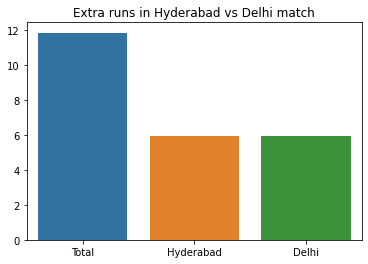

In [67]:
average_extras = pd.Series([avg_extras,avg_extras_Hyderabad,avg_extras_Delhi], index = ['Total','Hyderabad','Delhi'])
sns.barplot(x = average_extras.index, y = average_extras)
plt.title('Extra runs in Hyderabad vs Delhi match')
plt.show()

**Both teams concede 6 extra runs in a Hyderabad vs Delhi match.**

In [68]:
extras_overall_Hyderabad = []
for j in total_ids_Hyderabad:
    extra = df1[(df1['match_id'] == j) & (df1['bowling_team'] == 'Sunrisers Hyderabad')]['extra_runs'].sum()
    extras_overall_Hyderabad.append(extra)
print(extras_overall_Hyderabad)

[6, 3, 4, 11, 10, 7, 3, 5, 5, 3, 7, 10, 6, 4, 2, 8, 7, 8, 0, 7, 6, 2, 7, 6, 5, 10, 8, 7, 6, 14, 4, 5, 9, 6, 4, 9, 5, 10, 5, 3, 4, 1, 7, 8, 5, 15, 16, 7, 9, 3, 10, 7, 7, 7, 7, 4, 7, 1, 8, 7, 5, 8, 5, 5, 13, 3, 5, 6, 3, 3, 3, 14, 4, 9, 5, 9, 8, 8, 7, 8, 4, 2, 2, 1, 3, 5, 3, 1, 4, 7, 5, 3, 6, 4, 5, 7, 5, 6, 1, 9, 7, 5, 9, 5, 7, 8, 9, 5]


These are the total extras given by Hyderabad in overall IPL.

In [69]:
avg_extras_overall_Hyderabad = np.mean(extras_overall_Hyderabad)
avg_extras_overall_Hyderabad

6.074074074074074

~6 extras are given by Hyderabad in an average in overall IPL.

In [70]:
extras_overall_Delhi = []
for j in total_ids_Delhi:
    extra = df1[(df1['match_id'] == j) & ((df1['bowling_team'] == 'Delhi Daredevils') | (df1['bowling_team'] == 'Delhi Capitals'))]['extra_runs'].sum()
    extras_overall_Delhi.append(extra)
print(extras_overall_Delhi)

[6, 5, 2, 11, 4, 16, 10, 2, 8, 5, 19, 11, 10, 9, 7, 5, 9, 12, 7, 10, 11, 17, 11, 3, 4, 9, 9, 4, 8, 15, 11, 9, 11, 9, 4, 13, 8, 8, 9, 13, 3, 24, 6, 13, 5, 17, 10, 2, 16, 11, 3, 2, 7, 6, 10, 8, 3, 11, 12, 8, 5, 5, 18, 8, 8, 18, 10, 6, 4, 9, 0, 7, 6, 6, 6, 9, 2, 15, 5, 4, 4, 5, 16, 1, 4, 4, 8, 4, 6, 6, 9, 10, 3, 4, 9, 3, 9, 6, 7, 3, 11, 5, 6, 10, 5, 4, 14, 6, 5, 11, 4, 11, 12, 11, 9, 15, 15, 9, 15, 14, 6, 8, 4, 7, 11, 2, 12, 8, 8, 9, 4, 7, 0, 11, 4, 9, 3, 3, 13, 6, 11, 8, 11, 7, 7, 3, 10, 1, 3, 10, 6, 4, 14, 4, 7, 4, 6, 2, 11, 2, 7, 9, 7, 8, 9, 11, 5, 5, 5, 6, 5, 5, 5, 7, 9, 9, 11]


These are the total extras given by Delhi in overall IPL.

In [71]:
avg_extras_overall_Delhi = np.mean(extras_overall_Delhi)
avg_extras_overall_Delhi

7.8192090395480225

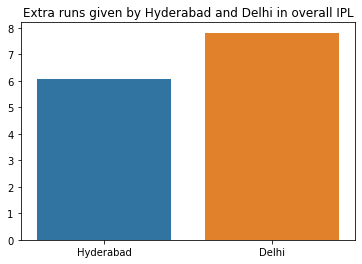

In [72]:
average_extras_overall = pd.Series([avg_extras_overall_Hyderabad,avg_extras_overall_Delhi], index = ['Hyderabad','Delhi'])
sns.barplot(x = average_extras_overall.index, y = average_extras_overall)
plt.title('Extra runs given by Hyderabad and Delhi in overall IPL')
plt.show()

**Delhi conceded more extra runs than Hyderabad in overall IPL.**